<a href="https://colab.research.google.com/github/dyjdlopez/linearAlgebra2021/blob/main/Week%2010%20-%20Linear%20Transformations/LinAlg_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra for CpE
## Laboratory 10 : Linear Transformations

Now that you have a understood the fundamentals of matrices and their operations we can move on to a more conceptual and practical application of linear algebra.

### Objectives
At the end of this activity you will be able to:
1. Be familiar with the role of matrix operations.
2. Visualize matrix operations.
3. Justify the precedence of matrix operations through Python.

## Discussion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Transformation

You can recall that a vector can be scaled or translated through different vector operations. We'll now dwell more on the translation and transformation of multi-dimensional vectors (i.e. matrices). This is possible using matrix operations. Take note that not all operations to matrices or $\mathbb{R}^2$ vectors are linear. Linear transformations leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflexion of a plane are examples of linear transformations.  Let's try to revisit them in this notebook. 

References: <br/>
<a href="https://mmas.github.io/linear-transformations-numpy"> Linear transformations in Numpy </a>

### Geometric Translation

There are two prime requirements for linear geometric translations:
1. Vectors remain linear upon applying the linear function
2. The origin of the vector does not change.

To make representation easier, I have provided a user-defined function for plotting the quivers of the vectors. The function takes in the matrix we wish to transform and a transformation matrix. If no transformation matrix is provided, the default is an identity matrix.

In [ ]:
def plot_quiv(x,t_mat=np.eye(2)):
    x_prime = x @ t_mat
    size= (2,2)
    plt.figure(figsize=(4,4))

    plt.xlim(-size[0],size[0])
    plt.ylim(-size[1],size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))


    plt.quiver([0,0],[0,0], x_prime[0,:], x_prime[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['red','blue'])## use column spaces
    plt.grid()
    plt.show()

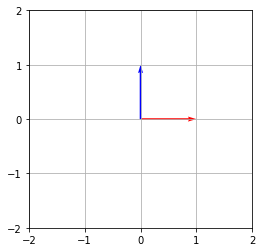

In [ ]:
A = np.array([
    [1, 0],
    [0, 1]
])

plot_quiv(A)

## Repositioning/Translation

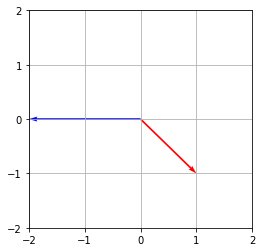

[[ 1 -2]
 [-1  0]]


In [ ]:
t_mat = np.array([
    [-1,0],
    [0,-1]
]) ### -1 * I ## scalar matrix
B = np.array([
              [-1,2],
              [1,0]
])
# plot_quiv(A@t_mat)
# print(A@t_mat)
plot_quiv(B@t_mat)
print(B@t_mat)

In [ ]:
t_mat = np.array([
    [-1,0],
    [0,-1]
])
plot_quiv(A, t_mat)

In [ ]:
t_mat = np.array([
    [1,0],
    [0,-1]
])
plot_quiv(A, t_mat)

## Shears

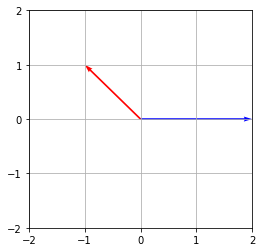

[[ 2 -2]
 [ 2  0]]


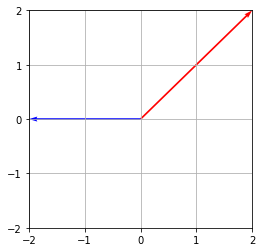

In [ ]:
A = np.eye(2)
## Transformation Matrices
shear1 = np.array([
    [1,1],
    [1,1]
])
shear2 = np.array([
    [2,0],
    [2,-1]
])
plot_quiv(B)
print(B.dot(shear2))
plot_quiv(B, shear2)
# plot_quiv(A, shear2)


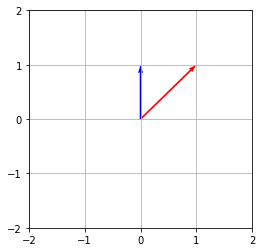

In [ ]:
shear = np.array([
    [1,0],
    [1,1]
])
plot_quiv(A, shear)

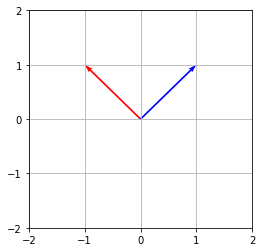

In [ ]:
shear = np.array([
    [-1,1],
    [1,1]
])
plot_quiv(A, shear)

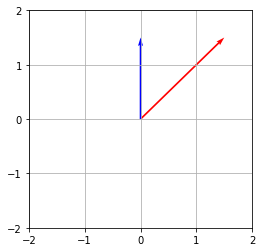

In [ ]:
shear = np.array([
    [1.5,0],
    [1.5,1.5]
])
plot_quiv(A, shear)

## Scaling

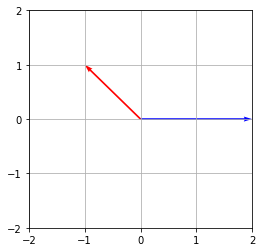

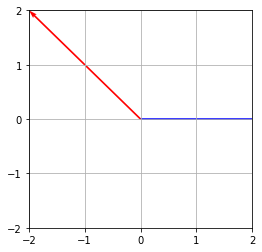

In [ ]:
## Scaling matrix
scale = np.array([
    [2,0],
    [0,2]
])

# scale2 = 0.5*np.eye(2)

plot_quiv(B)
plot_quiv(B, scale)

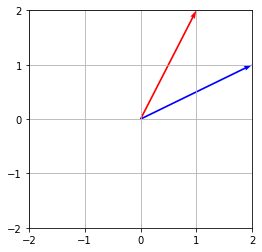

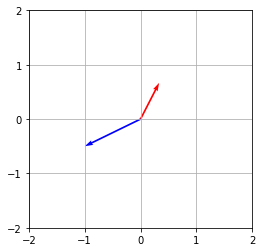

In [ ]:
X = np.array([
    [1,2],
    [2,1]
])
scale = np.array([
    [0.3333,0],
    [0,-0.5]
])
plot_quiv(X)
plot_quiv(X,scale)

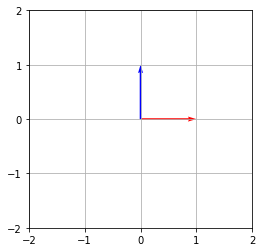

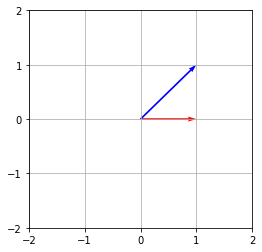

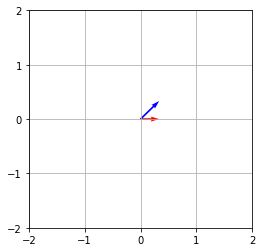

[[0.33333333 0.33333333]
 [0.         0.33333333]]


In [ ]:
Y = np.eye(2)
plot_quiv(Y)
t_mat = np.array([
    [1,1],
    [0,1]
])
t_mat2 = np.array([
    [1/3,0],
    [0,1/3]
])
Y_prime = t_mat@Y
Y_prime2 = t_mat2 @ t_mat @ Y
plot_quiv(Y_prime) ## Y_prime
plot_quiv(Y_prime2) ## Y_prime2
print(t_mat2@t_mat)

## Rotation

In [ ]:
def rot_matrix(theta):
    theta = np.deg2rad(theta)
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return rot_mat

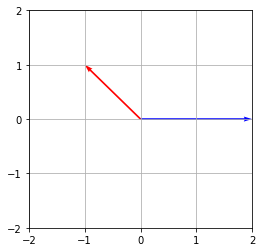

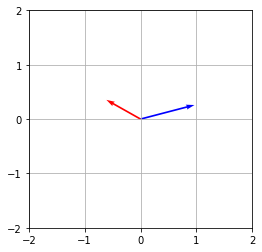

In [ ]:
rotate = rot_matrix(15)
plot_quiv(B)
scale = 0.5*np.eye(2)
plot_quiv(scale@rotate@B)

[[ 0.5 -1. ]
 [ 0.5 -1. ]]


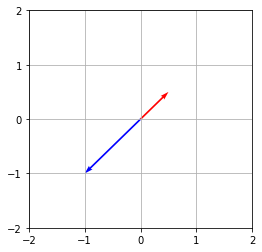

In [ ]:
G = np.array([
    [0.5,-1],
    [0.5,-1]
])
print(G)
plot_quiv(G)

# 3D Transformations

In [ ]:
def plot_3d_quiv(x, azimuth=0, elevation=0):
#     x_prime = x @ t_mat
#     print(x_prime)
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.gca(projection='3d')
    ax1.set_xlim([-2, 2])
    ax1.set_ylim([-2, 2])
    ax1.set_zlim([-2, 2])
    ax1.set_xlabel("X (roll)")
    ax1.set_ylabel("Y (pitch)")
    ax1.set_zlabel("Z (yaw)")

    origin = (0,0,0)
    ax1.quiver(origin, origin, origin, x[0,:], x[1,:], x[2,:], 
               arrow_length_ratio=0.1, colors=['red','blue','green'])
    plt.grid()
    ax1.view_init(azim=azimuth, elev=elevation)        
    plt.show()
    

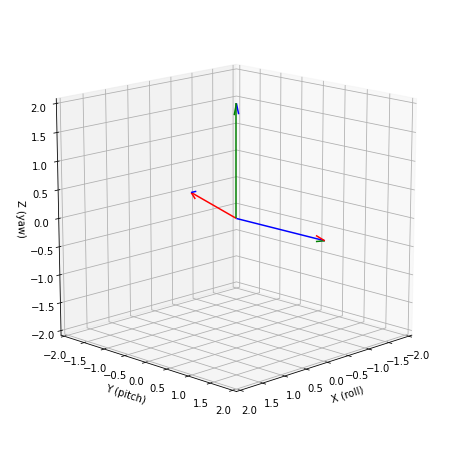

In [ ]:
X = np.eye(3)
t_mat = np.array([
    [2,0,0],
    [1,2,0],
    [1,0,2]
])
# plot_3d_quiv(X, 30, 50)
plot_3d_quiv(t_mat@X, 45, 15)

In [ ]:
def rot_matrix_3d(roll, pitch, yaw):
    alpha = [np.deg2rad(roll), np.deg2rad(pitch), np.deg2rad(yaw)]
    roll = np.array([
        [1,0,0],
        [0, np.cos(alpha[0]), -np.sin(alpha[0])],
        [0, np.sin(alpha[0]), np.cos(alpha[0])]
    ])
    pitch = np.array([
        [np.cos(alpha[1]), 0, np.sin(alpha[1])],
        [0 ,1 ,0],
        [-np.sin(alpha[1]), 0, np.cos(alpha[1])]
    ])
    yaw = np.array([
        [np.cos(alpha[2]), -np.sin(alpha[2]), 0],
        [np.sin(alpha[2]), np.cos(alpha[2]), 0],
        [0,0,1]
    ])
    res = roll @ pitch @ yaw
    return roll, pitch, yaw, res

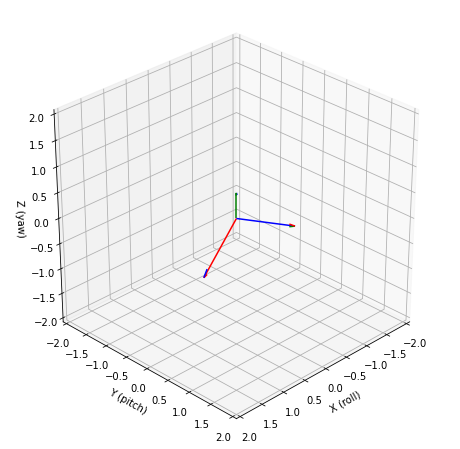

In [ ]:
r_x, r_y, r_z, r_mat = rot_matrix_3d(roll=0,pitch=0,yaw=30)
M = np.array([
    [2,0,0],
    [0,1,0],
    [0,0,0.5]
])
# scale = 1.5*np.eye(3)
plot_3d_quiv(r_mat@M, 45,30)

## Supplementary Activity

Try to implement the linear transformations using spancs using the scatteplot view. Just do at least one example of linear transformation for a 2D space.

### Conclusion

As a conclusion briefly explain the essence of linear transformations. Additionally, cite an example of using linear transformation in mechanics.